<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/transfer_learning_keras_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow only CNN on MNIST with MiniBatch evaluation

- From [Deep Learning For Beginners Using Transfer Learning In Keras](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e) by Aditya Anantharamam in [towardsdatascience.com](https://towardsdatascience.com).

    - Author: [Aditya Anantharaman](https://github.com/aditya9898)
    - GitHub Repository: https://github.com/aditya9898/transfer-learning/

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.

**NOTE** This is currently a **Colab only** notebook. It will need significant changes to work locally.

## We'll try to answer three big questions:

### What is transfer learning ?
### Why does transfer learning work so well ?
### How can I coding an image recognizer using transfer learning?

## What Is Transfer Learning ?

If not for Transfer Learning, Machine Learning is a pretty tough thing to do for an absolute beginner. At the lowest level, machine learning involves computing a function that maps some inputs to their corresponding outputs. Though the function itself is just a bunch of addition and multiplication operations, when passed through a non linear activation function and stacking a bunch of these layers together, **functions can be made, to learn literally anything**, Provided there’s enough data to learn from, and an enormous amount of computational power.

### Welcome to Deep Learning.

Convolutional Neural Networks can learn extremely complex mapping functions when trained on enough data. We can’t yet understand how a convolutional net learns such complicated functions.

At a base level, the weights of a CNN (Convolutional Neural Network) consist of **filters**. Think of a filter as an $(n*n)$ matrix which consists of certain numbers. Now this filter is **convoluted(slide and multiply)** through the provided image. Assume the input image is of size $(10,10)$ and the filter is of size $(3,3)$, first the filter is multiplied with the 9 pixels on the top-left of the input image, this multiplication produces another $(3,3)$ matrix. The values of the 9 pixels of this matrix are summed up and this value becomes a single pixel value on the top-left of **layer_2** of the CNN.

<figure>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/tl_cnn.png?raw=1" />
  </center>
</figure>


Basically the training of a CNN involves, finding of the right values on each of the filters so that an input image when passed through the multiple layers, activates certain neurons of the last layer so as to predict the correct class.
**bold text**
Though training a CNN from scratch is possible for small projects, most applications require the training of very large CNN’s and this as you guessed, takes extremely huge amounts of processed data and computational power. And both of these are not found so easily these days.

**That’s where transfer learning comes into play**. In transfer learning, we take the pre-trained weights of an already trained model(one that has been trained on millions of images belonging to 1000’s of classes, on several high power GPU’s for several days) and use these already learned features to predict new classes.

***The advantages of transfer learning are that:***

> ***1: There is no need of an extremely large training dataset.***

> ***2: Not much computational power is required.As we are using pre-trained weights and only have to learn the weights of the last few layers.***

There are several models that have been trained on the image net dataset and have been open sourced.

For example, VGG-16, VGG-19, Inception-V3 etc. For more details about each of these models, read the official keras documentation [here](https://keras.io/applications/).


## Why Does Transfer Learning Work So Well ?

To learn why transfer learning works so well, we must first look at what the different layers of a convolutional neural network are really learning.
When we train a deep convolutional neural network on a dataset of images, during the training process, the images are passed through the network by applying several filters on the images at each layer. The values of the filter matrices are multiplied with the activations of the image at each layer. The activations coming out of the final layer are used to find out which class the image belongs to.

When we train a deep network, out goal is to find the optimum values on each of these filter matrices so that when an image is propagated through the network, the output activations can be used to accurately find the class to which the image belongs. The process used to find these filter matrix values is gradient descent.

When we train a conv net on the imagenet dataset and then take a look at what the filters on each layer of the conv net has learnt to recognize, or what each filter gets activated by, we are able to see something really interesting.

<figure>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/tl_vis12.png?raw=1" />
  </center>
</figure>

The filters on the first few layers of the conv net learn to recognize colors and certain horizontal and vertical lines.

The next few layers slowly learn to recognize trivial shapes using the lines and colors learnt in the previous layers.

Then the next layers learn to recognize textures, then parts of objects like legs, eyes, nose etc.

Finally the filters in the last layers get activated by whole objects like dogs, cars etc.

<figure>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/tl_vis345.png?raw=1" />
  </center>
</figure>

Now lets get to transfer learning. The reason why it works so well is that, we use a network which is pretrained on the imagenet dataset and this network has already learnt to recognize the trivial shapes and small parts of different objects in its initial layers. By using a pretrained network to do transfer learning, we are simply adding a few dense layers at the end of the pretrained network and learning what combination of these already learnt features help in recognizing the objects in our new dataset.

Hence we are training only a few dense layers. Furthermore, we are using a combination of these already learnt trivial features to recognize new objects. All this helps in making the training process very fast and require very less training data compared to training a conv net from scratch.

## Heres how to build an actual image recognition model using transfer learning in Keras.

The model that we’ll be using here is the [MobileNet](https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299).

Mobile net is a model which gives reasonably good imagenet classification accuracy and occupies very less space. (17 MB according to keras docs).

Dependencies Required :
- Keras (with tensorflow backend)
- Numpy
- Matplotlib
- Pandas

#### Data Requirement:

- The training data must be stored in a particular format in order to be fed into the network to train. We will be using ImageDataGenerator, available in keras to train our model on the available data. That way the process becomes much simpler in terms of code.

- There must be a main data folder, inside that data folder, there must be a folder for each class of data containing the corresponding images. The names of the folders must be the names of their respective classes.

## The building of a model is a 3 step process:

> 1. Importing the pre-trained model and adding the dense layers.

> 2. Loading train data into ImageDataGenerators.

> 3. Training and Evaluating model.

# Let the Coding Begin!

**Usage NOTE!** Use `Shift+Enter` to step through this notebook, executing the code as you go.

In [0]:
class Context:
    VERBOSE=False    # True for extensive logging during execution.
    QUIET=False      # True for minimal logging during execution.
    WARNINGS=False   # True to enable display of annoying but rarely useful messages.

In [0]:
#@title Check Runtime
import os
import tensorflow as tf
import numpy as np
import timeit
import time
from datetime import timedelta
from contextlib import redirect_stderr

# Suppress Tensorflow log spew.
if Context.WARNINGS:
    import keras    
else:
    tf.logging.set_verbosity(tf.logging.ERROR)
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

    # Suppress Keras log spew.
    with redirect_stderr(open(os.devnull, "w")):
        import keras    

try:
   device_name = os.environ['COLAB_TPU_ADDR']
   TPU_ADDRESS = 'grpc://' + device_name
   print(f'Running with TPU acceleration at {TPU_ADDRESS}')
except KeyError:
  GPU_NAME = tf.test.gpu_device_name()
  if GPU_NAME.startswith('/device:GPU'): 
      print(f"Running with GPU acceleration at {GPU_NAME}")
  else:
      print("Running on normal CPU without GPU acceleration.")
        
def elapsed_time(func, *args, msg=''):
    ''' Display the elapsed time of the function.
        Return the function value.
    '''
    stime = time.time()
    result = func(*args)
    etime = time.time() - stime
    log(msg + "Elapsed test time: {0}", timedelta(seconds=etime))
    return result  

Running on normal CPU without GPU acceleration.


### The Training Set

We'll rip the last layer off the previously trained model, and retrain it against three sets of images, cats, dogs, and horses. Here are some of the images represented in the training sets.

### Cats (106 examples)
<figure>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/tl_catset.PNG?raw=1" />
  </center>
</figure>

### Dogs (35 examples)
<figure>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/tl_dogset.PNG?raw=1" />
  </center>
</figure>

### Horses (56 examples)
<figure>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/tl_horseset.PNG?raw=1" />
  </center>
</figure>

## Copy the Transfer Learning Training images to here.

This uses some nasty tricks to get around githubusercontent.com's refusal to allow wget downloading of entire directories.  This is really nasty.

**NOTE!** This currently only runs in Colab, not locally.

In [0]:
#@title Nasty File Transfer Utility Tools
import numpy as np
import requests
import shutil
import os
from bs4 import BeautifulSoup

ds = np.DataSource()
def copyHere(URL, toPath, quiet=False):
    toDir, toFile = os.path.split(toPath)
    toPath = os.path.join(toDir, toFile)
    if os.path.exists(toPath):
        if not quiet:
            print(f"- Skipped copy of existing file {toPath}.")
    else:
        if ds.exists(URL):
            if not toFile:
                urlPrefix, toFile = os.path.split(URL)
            response = requests.get(URL, stream=True)
            if toDir:
                if not os.path.exists(toDir): 
                  print(f"- Creating directory '{toDir}'.")
                  os.makedirs(toDir)
            with open(toPath, 'wb') as fin: shutil.copyfileobj(response.raw, fin)
            if not quiet:
                print(f"- Copied {URL} to {toPath}.")
        else:
            print(f"** Sorry, can't copy '{URL}' to '{toPath}'.")

def get_url_files(url, ext='', params={}):
    response = requests.get(url, params=params)
    if response.ok:
        response_text = response.text
    else:
        return response.raise_for_status()
    soup = BeautifulSoup(response_text, 'html.parser')
    parent = [url + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]
    files = [os.path.basename(f) for f in parent]    
    return files            

In [0]:
filename = 'Z.jpg'
REPO     = 'https://raw.githubusercontent.com/aditya9898/transfer-learning/'
BRANCH   = 'master/'
DIR      = 'train/cats/'
TMPDIR   = 'tmpData'

url = 'https://github.com/aditya9898/transfer-learning/tree/master/'
ext = 'jpg'

print("- Please wait ... this may take a few minutes.")
for imgdir in ['train/cats', 'train/dogs', 'train/horses']:
    TODIR = os.path.join(TMPDIR, imgdir)
    files =  get_url_files(url + imgdir, ext)
    print(f"- Downloading all images to {TODIR}:")
    for img in files:
        URL = os.path.join(REPO, BRANCH, imgdir, img)
        toPath  = os.path.join(TODIR, img)
        #print(f'- Copy {URL} to {toPath}')
        copyHere(URL, toPath, quiet=True)

- Please wait ... this may take a few minutes.
- Downloading all images to tmpData/train/cats:
- Downloading all images to tmpData/train/dogs:
- Downloading all images to tmpData/train/horses:


## Here are the main dependencies.

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Then import the pre-trained MobileNet model. The Mobilenet (trained on the imagenet dataset for a thousand classes) will have a last layer consisting of 1000 neurons (one for each class). We want as many neurons in the last layer of the network as the number of classes we wish to identify. So we discard the 1000 neuron layer and add our own last layer for the network.

This can be done by setting (IncludeTop=False) when importing the model.
So suppose you want to train a dog breed classifier to identify 120 different breeds, we need 120 neurons in the final layer. This can be done using the following code.

*This is **step 1** of the process. Importing and building the required model.*

We import the MobileNet model without its last layer and add a few dense layers so that our model can learn more complex functions. The dense layers must have the relu activation function and the last layer,which contains as many neurons as the number of classes must have the softmax activation.

In [0]:
# imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet', include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)

# we add a few dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 1
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x)  #dense layer 3

# we only have three different items to discriminate in our new system
# so converge the results from our training into 3 nodes
# as a final layer with softmax activation.
preds=Dense(3,activation='softmax')(x) 

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


### Next we make a model based on the architecture we have provided.


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

### To check the architecture of our model, we simply need to use this:

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

Now that we have our model, as we will be using the pre-trained weights, that our model has been trained on (imagenet dataset), we have to set all the weights to be non-trainable. We will only be training the last Dense layers that we have made previously. The code for doing this is given below.

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
# ./train/ has been downloaded from https://github.com/aditya9898/transfer-learning/tree/master/train
#
train_generator=train_datagen.flow_from_directory(os.path.join(TMPDIR, 'train'), 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 197 images belonging to 3 classes.


Next we move onto **Step 3**, training the model on the dataset.

For this we first compile the model that we made, and then train our model with our generator. 

### This will take a while...

In [0]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
6/6 [==============================] - 47s 8s/step - loss: 1.2102 - acc: 0.5677
Epoch 2/10
6/6 [==============================] - 36s 6s/step - loss: 0.2000 - acc: 0.9198
Epoch 3/10
6/6 [==============================] - 36s 6s/step - loss: 0.1455 - acc: 0.9386
Epoch 4/10
6/6 [==============================] - 36s 6s/step - loss: 0.0710 - acc: 0.9840
Epoch 5/10
6/6 [==============================] - 37s 6s/step - loss: 0.0560 - acc: 0.9787
Epoch 6/10
6/6 [==============================] - 37s 6s/step - loss: 0.0223 - acc: 0.9947
Epoch 7/10
6/6 [==============================] - 37s 6s/step - loss: 0.1559 - acc: 0.9652
Epoch 8/10
6/6 [==============================] - 42s 7s/step - loss: 0.2366 - acc: 0.9531
Epoch 9/10
6/6 [==============================] - 37s 6s/step - loss: 0.1355 - acc: 0.9574
Epoch 10/10
6/6 [==============================] - 36s 6s/step - loss: 0.2001 - acc: 0.9066


## Now Make Predictions with the new Model

With this, we will have trained a model. The trained model can then be used to predict which class a new unseen image belongs to, by using:

```
    model.predict(new_image).
```

Using Google Images, I find a few images, and load them locally.


In [0]:
TESTDIR = os.path.join(TMPDIR, 'test')
if not os.path.exists(TESTDIR): os.makedirs(TESTDIR)

horseUrl = 'https://thehorse.com/wp-content/uploads/2017/09/paint-horse-running-in-field.jpg'
testHorse = os.path.join(TESTDIR, 'horse.jpg')
!curl $horseUrl -o $testHorse 

dogUrl = 'https://peopledotcom.files.wordpress.com/2019/06/shetland-sheepdog.jpg'
testDog = os.path.join(TESTDIR, 'dog.jpg')
!curl $dogUrl -o $testDog 

catUrl = 'https://timesofindia.indiatimes.com/thumb/msid-67586673,width-800,height-600,resizemode-4/67586673.jpg'
testCat = os.path.join(TESTDIR, 'cat.jpg')
!curl $catUrl -o $testCat 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  134k  100  134k    0     0   495k      0 --:--:-- --:--:-- --:--:--  495k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1221k  100 1221k    0     0  4827k      0 --:--:-- --:--:-- --:--:-- 4827k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42565  100 42565    0     0   261k      0 --:--:-- --:--:-- --:--:--  263k


From the [Keras MobileNet](https://keras.io/applications/#mobilenet) documentation, we know that:

> input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.



- Reading image file tmpData/test/horse.jpg
- Input image is (1193, 1500, 3)
- Resized image is (224, 224, 3)


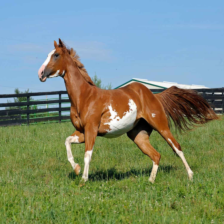

- Reading image file tmpData/test/cat.jpg
- Input image is (600, 800, 3)
- Resized image is (224, 224, 3)


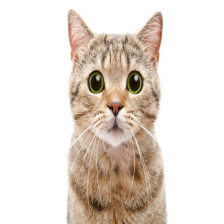

- Reading image file tmpData/test/dog.jpg
- Input image is (1442, 2000, 3)
- Resized image is (224, 224, 3)


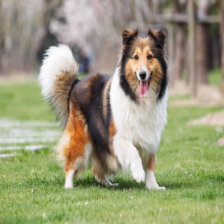

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import skimage

images = []
for f in [testHorse, testCat, testDog]:
    print(f'- Reading image file {f}')
    img = load_img(f)
    bigx = img_to_array(img)

    print (f'- Input image is {bigx.shape}')
    new_shape = (224,224,3)
    x = skimage.transform.resize(bigx, new_shape)
    print (f'- Resized image is {x.shape}')
    images.append(x)

    small_img = array_to_img(x)
    display(small_img)

## Infer the types of our test images

The order of our classes is CATS, DOGS, HORSES.  How do we do?

In [0]:
input_images = np.array(images)
results = model.predict(input_images, verbose=1)

3/3 [==============================] - 0s 109ms/step


In [0]:
np.set_printoptions(formatter={'float_kind':lambda x: f'{x*100:0.0f}%'})
print(results)
np.set_printoptions()

[[0% 0% 100%]
 [93% 5% 2%]
 [56% 14% 30%]]


Note that the dog recognition was terrible. 

We only trained with 35 dog images, and not very good ones at that; this contrasts with 106 cats, and 56 horses -- more training data is clearly needed.



### End of notebook.